<a href="https://colab.research.google.com/github/i-ninte/data-analytics-R-python/blob/main/CHURN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.17.0'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data=pd.read_csv("customer_churn_dataset-training-master.csv")

In [ ]:
data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2,30,Female,39,14,5,18,Standard,Annual,932.0,17.0,1.0
1,3,65,Female,49,1,10,8,Basic,Monthly,557.0,6.0,1.0
2,4,55,Female,14,4,6,18,Basic,Quarterly,185.0,3.0,1.0
3,5,58,Male,38,21,7,7,Standard,Monthly,396.0,29.0,1.0
4,6,23,Male,32,20,5,8,Basic,Monthly,617.0,20.0,1.0


In [ ]:
y= data['Churn']

In [ ]:
y.head()

,Churn
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [ ]:
x=data.drop(columns=['Churn',	'CustomerID'])

In [ ]:
x.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,30,Female,39,14,5,18,Standard,Annual,932.0,17.0
1,65,Female,49,1,10,8,Basic,Monthly,557.0,6.0
2,55,Female,14,4,6,18,Basic,Quarterly,185.0,3.0
3,58,Male,38,21,7,7,Standard,Monthly,396.0,29.0
4,23,Male,32,20,5,8,Basic,Monthly,617.0,20.0


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41315 entries, 0 to 41314
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                41315 non-null  int64  
 1   Gender             41315 non-null  object 
 2   Tenure             41315 non-null  int64  
 3   Usage Frequency    41315 non-null  int64  
 4   Support Calls      41315 non-null  int64  
 5   Payment Delay      41315 non-null  int64  
 6   Subscription Type  41314 non-null  object 
 7   Contract Length    41314 non-null  object 
 8   Total Spend        41314 non-null  float64
 9   Last Interaction   41314 non-null  float64
dtypes: float64(2), int64(5), object(3)
memory usage: 3.2+ MB


In [ ]:
x.describe()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction
count,41315.000000,41315.000000,41315.000000,41315.000000,41315.000000,41314.000000,41314.000000
mean,41.518770,30.503110,15.469466,5.032022,15.032046,549.455148,15.498185
std,13.863462,17.419545,8.690747,3.156166,8.963084,259.156746,8.662916
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000
25%,29.000000,15.000000,8.000000,2.000000,7.000000,325.000000,8.000000
50%,42.000000,31.000000,15.000000,5.000000,15.000000,550.000000,16.000000
75%,54.000000,46.000000,23.000000,8.000000,23.000000,772.000000,23.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000


In [ ]:
x.isnull().sum()

,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,1
Contract Length,1
Total Spend,1
Last Interaction,1


In [ ]:
x=x.drop_duplicates()

In [ ]:
X=x.dropna()

In [ ]:
X.isna().sum()


,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0
Last Interaction,0


In [ ]:
X.shape

(41314, 10)

In [ ]:
y.isna().sum()

1

In [ ]:
y= y.dropna()

In [ ]:
y.isna().sum()

0

In [ ]:
##Feature engineering
X.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,30,Female,39,14,5,18,Standard,Annual,932.0,17.0
1,65,Female,49,1,10,8,Basic,Monthly,557.0,6.0
2,55,Female,14,4,6,18,Basic,Quarterly,185.0,3.0
3,58,Male,38,21,7,7,Standard,Monthly,396.0,29.0
4,23,Male,32,20,5,8,Basic,Monthly,617.0,20.0


In [ ]:
# One-hot encoding with drop_first to avoid multicollinearity
gender = pd.get_dummies(X['Gender'], drop_first=True)
subscription = pd.get_dummies(X['Subscription Type'], drop_first=True)
contract = pd.get_dummies(X['Contract Length'], drop_first=True)

# Drop the original categorical columns
X = X.drop(columns=['Gender', 'Subscription Type', 'Contract Length'], axis=1)

# Concatenate the encoded values with the dataframe
X = pd.concat([X, gender, subscription, contract], axis=1)

# Check the updated dataframe
print(X.head())


   Age  Tenure  Usage Frequency  Support Calls  Payment Delay  Total Spend  \
0   30      39               14              5             18        932.0   
1   65      49                1             10              8        557.0   
2   55      14                4              6             18        185.0   
3   58      38               21              7              7        396.0   
4   23      32               20              5              8        617.0   

   Last Interaction   Male  Premium  Standard  Monthly  Quarterly  
0              17.0  False    False      True    False      False  
1               6.0  False    False     False     True      False  
2               3.0  False    False     False    False       True  
3              29.0   True    False      True     True      False  
4              20.0   True    False     False     True      False  


In [ ]:
# Convert boolean columns to integers (0 and 1)
X[['Male', 'Premium', 'Standard', 'Monthly', 'Quarterly']] = X[['Male', 'Premium', 'Standard', 'Monthly', 'Quarterly']].astype(int)

# Check the updated DataFrame
print(X.head())


   Age  Tenure  Usage Frequency  Support Calls  Payment Delay  Total Spend  \
0   30      39               14              5             18        932.0   
1   65      49                1             10              8        557.0   
2   55      14                4              6             18        185.0   
3   58      38               21              7              7        396.0   
4   23      32               20              5              8        617.0   

   Last Interaction  Male  Premium  Standard  Monthly  Quarterly  
0              17.0     0        0         1        0          0  
1               6.0     0        0         0        1          0  
2               3.0     0        0         0        0          1  
3              29.0     1        0         1        1          0  
4              20.0     1        0         0        1          0  


In [ ]:
X.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Male,Premium,Standard,Monthly,Quarterly
0,30,39,14,5,18,932.0,17.0,0,0,1,0,0
1,65,49,1,10,8,557.0,6.0,0,0,0,1,0
2,55,14,4,6,18,185.0,3.0,0,0,0,0,1
3,58,38,21,7,7,396.0,29.0,1,0,1,1,0
4,23,32,20,5,8,617.0,20.0,1,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
X_train

array([[ 0.17843746,  1.46367534,  0.86916922, ...,  1.40645091,
        -0.7119743 , -0.70229844],
       [ 1.61944429,  1.23367299,  0.17964887, ..., -0.71100953,
         1.40454509, -0.70229844],
       [ 1.47534361,  1.69367769, -1.19939185, ..., -0.71100953,
        -0.7119743 ,  1.42389609],
       ...,
       [-1.33461971,  1.23367299,  0.06472881, ..., -0.71100953,
        -0.7119743 , -0.70229844],
       [-1.69487141, -1.06635048, -0.62479155, ...,  1.40645091,
        -0.7119743 ,  1.42389609],
       [ 0.82689054, -0.72134696, -1.54415203, ...,  1.40645091,
        -0.7119743 ,  1.42389609]])

In [ ]:
X_train.shape

(33051, 12)

**ANN MODEL**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import ReLU,LeakyReLU
from tensorflow.keras.layers import BatchNormalization

**initializing Ann**

In [ ]:
classifier = Sequential()

In [ ]:
## adding inputs
classifier.add(Dense(units=12, activation= "relu"))

In [ ]:
## ADDING FIRST HIDDEN LAYERS
classifier.add(Dense(units=8, activation= "relu"))

In [ ]:
## second layer
classifier.add(Dense(units=6, activation ="relu"))

In [ ]:
## output layer
classifier.add(Dense(1, activation="sigmoid"))

In [ ]:
classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
import tensorflow as tf

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)


**TRAINING**

In [ ]:
## Early Stopping
import tensorflow as tf
early_stopping= tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
 model_history= classifier.fit(X_train,y_train,validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping )

Epoch 1/1000
2215/2215 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9959 - loss: 0.0122 - val_accuracy: 0.9935 - val_loss: 0.0180
Epoch 2/1000
2215/2215 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9954 - loss: 0.0112 - val_accuracy: 0.9933 - val_loss: 0.0169
Epoch 3/1000
2215/2215 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9942 - loss: 0.0123 - val_accuracy: 0.9913 - val_loss: 0.0212
Epoch 3: early stopping


In [ ]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

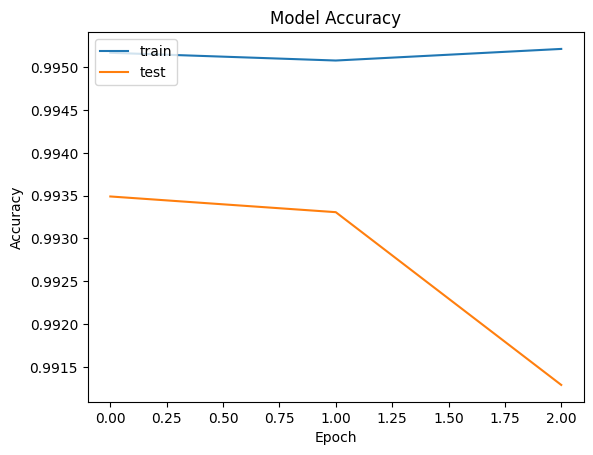

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy over epochs
plt.plot(model_history.history['accuracy'], label='Train Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
